In [1]:
#Import Packages

from typing import Iterator, List, Union, Tuple
from datetime import datetime
from time import strftime
from sklearn.model_selection import train_test_split
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, History
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.utils import plot_model

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.3.0
Num GPUs Available:  1


C:\Users\illew\anaconda3\envs\tf-gpu-hardness\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
%%time

#Load Model
model_name='res_cnn_03_11_18_54'
model = tf.keras.models.load_model("./data/models/"+model_name)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 200, 200, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 32) 896         batch_normalization[0][0]        
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 200, 200, 32) 0           conv2d[0][0]                     
_______________________________________________________________________________________

In [3]:
#Load Sample Image
path_to_sample="./Human_Test_Map.png"
img = image.load_img(path_to_sample)
magfactor = 2
width = np.shape(img)[0]
height = np.shape(img)[1]
newwidth = int(magfactor * width)
newheight = int(magfactor * height)
img = img.resize((newheight, newwidth), Image.ANTIALIAS)
img = image.img_to_array(img)
img = img/255

#Initialize Virtual Hardness Testing
window = 200
x_res=newwidth-window
y_res=newheight-window
hardness_map = np.zeros((newwidth,newheight))

#Loop Through Sample Image and Evaluate
for i in range(x_res):
    for j in range(y_res):
        testing_window = img[i:i+window,j:j+window]
        testing_window = np.expand_dims(testing_window, axis = 0)
#         print(np.shape(testing_window), i, j)
        hardness_map[i+int(window/2),j+int(window/2)] = float(model.predict(testing_window, verbose=0))
     

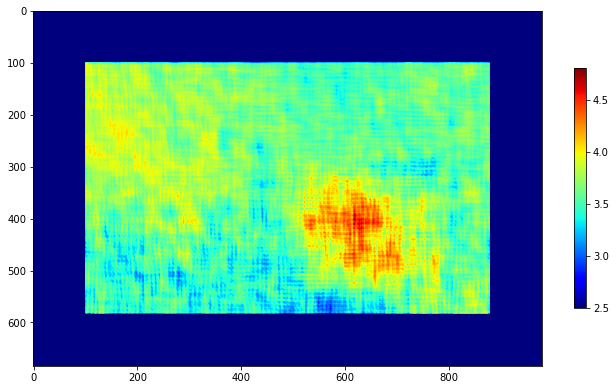

In [7]:
#Display Hardness Map
Save = False
if Save:
    np.savetxt("Human_Test_Map"+"_ResNet_HARDNESS.csv", hardness_map, delimiter=",")

fig, ax = plt.subplots(figsize=(width/30,height/30))
pos = ax.imshow(hardness_map, cmap='jet', vmin=2.5, vmax=4.8) 
ax.set_aspect('equal')
fig.colorbar(pos, ax=ax, shrink=0.27)    
    